<h1 style="color:blue;">Scenario 10 - DATA 6310</h1> 

- C2.S10.Py01   Installing ntlk 
- C2.S10.Py02	Import and combine .txt files 
- C2.S10.Py03	Finding patterns using .contains and .match
- C2.S10.Py04	Creating a Word Cloud for reviews
- C2.S10.Py05	nltk and stopwords for better results
- C2.S10.Py06	Stemming and Lemmatizing True Reviews
- C2.S10.Py07	Lemmatizing Deceptive Reviews and comparing to True



In [16]:
#Code Block 1

import glob
import os
import zipfile
import pandas as pd
import numpy as np
import datetime

# New trick to widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_34266/3989527023.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h2 style="color:blue;"> Download and install nltk    </h2>
- When using nltk for the first time, you will need to excute ntlk.download()

In [19]:
#Code Block 2

import nltk
#nltk.download()

from collections import Counter

In [23]:
#Code Block 3

text_say = nltk.word_tokenize("Hi how are you?")
text_say

['Hi', 'how', 'are', 'you', '?']

In [25]:
#Code Block 4

Counter(text_say).most_common(20)

[('Hi', 1), ('how', 1), ('are', 1), ('you', 1), ('?', 1)]

### Add stopwords

In [27]:
#Code Block 5

from nltk.corpus import stopwords

In [29]:
#Code Block 6

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donovanmanogue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h2 style="color:blue;">Import and combine .txt files</h2> 

### Import multiples files from directory
1. Specify the dir, which can be done by using os.getcwd (get current working directory)
2. Create paths for each folder - since ethere are four folders with .txt files
3. Pull in the text files using glob
    - https://www.poftut.com/python-glob-function-to-match-path-directory-file-names-with-examples/
4. Use a function combine the .txt files
5. Read the table and create a DataFrame

### 1. Specify the Directory

In [31]:
#Code Block 7

dir = os.getcwd()
dir

'/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10'

### 2. Create paths for each folder

In [33]:
#Code Block 8

folder_negtrue = dir +'/negative_true'
folder_negdec = dir +'/negative_deceptive'
folder_postrue = dir +'/positive_true'
folder_posdec = dir +'/positive_deceptive'

In [35]:
#Code Block 9

os.listdir(folder_negtrue)

['t_hardrock_4.txt',
 't_knickerbocker_7.txt',
 't_james_17.txt',
 't_talbott_17.txt',
 't_palmer_12.txt',
 't_swissotel_8.txt',
 't_conrad_1.txt',
 't_sheraton_3.txt',
 't_omni_19.txt',
 't_hilton_2.txt',
 't_hardrock_16.txt',
 't_allegro_12.txt',
 't_omni_5.txt',
 't_amalfi_3.txt',
 't_ambassador_18.txt',
 't_knickerbocker_11.txt',
 't_hyatt_10.txt',
 't_talbott_4.txt',
 't_talbott_5.txt',
 't_hyatt_11.txt',
 't_knickerbocker_10.txt',
 't_james_1.txt',
 't_ambassador_19.txt',
 't_amalfi_2.txt',
 't_omni_4.txt',
 't_allegro_13.txt',
 't_hardrock_17.txt',
 't_omni_18.txt',
 't_hilton_3.txt',
 't_sheraton_2.txt',
 't_swissotel_9.txt',
 't_talbott_16.txt',
 't_palmer_13.txt',
 't_james_16.txt',
 't_knickerbocker_6.txt',
 't_hardrock_5.txt',
 't_knickerbocker_4.txt',
 't_hardrock_7.txt',
 't_palmer_11.txt',
 't_talbott_14.txt',
 't_james_14.txt',
 't_conrad_2.txt',
 't_hilton_1.txt',
 't_hardrock_15.txt',
 't_allegro_11.txt',
 't_omni_6.txt',
 't_james_3.txt',
 't_knickerbocker_12.txt',
 

### 3. Pull in the text files using glob

In [37]:
#Code Block 10

filename_negtrue = glob.glob(folder_negtrue + "/*.txt")
filename_negtrue

['/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_hardrock_4.txt',
 '/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_knickerbocker_7.txt',
 '/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_james_17.txt',
 '/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_talbott_17.txt',
 '/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_palmer_12.txt',
 '/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_swissotel_8.txt',
 '/Users/donovanmanogue/Documents/Data 6310/Scenario 10 Creating your own bag of words/DATA6310_Scenario10/negative_true/t_conrad_1.txt',
 '/Users/donovanman

In [39]:
#Code Block 11

filename_negdec = glob.glob(folder_negdec + "/*.txt")
filename_postrue = glob.glob(folder_postrue + "/*.txt")
filename_posdec = glob.glob(folder_posdec + "/*.txt")

### 4. Use a function combine the .txt files

In [41]:
#Code Block 12

with open('data/negative_true.txt', 'w') as f:
    for file in filename_negtrue:
        with open(file) as infile:
            f.write(infile.read()+'\n')

In [43]:
#Code Block 13

with open('data/negative_deceptive.txt', 'w') as f:
    for file in filename_negdec:
        with open(file) as infile:
            f.write(infile.read()+'\n')

In [45]:
#Code Block 14

with open('data/positive_true.txt', 'w') as f:
    for file in filename_postrue:
        with open(file) as infile:
            f.write(infile.read()+'\n')

In [47]:
#Code Block 15

with open('data/positve_deceptive.txt', 'w') as f:
    for file in filename_posdec:
        with open(file) as infile:
            f.write(infile.read()+'\n')

### 5. Read the table and create a DataFrame

In [50]:
#Code Block 16

neg_true = pd.read_table('data/negative_true.txt', sep='\r\t', header=None)
neg_dec = pd.read_table('data/negative_deceptive.txt', sep='\r\t', header=None)
pos_true = pd.read_table('data/positive_true.txt', sep='\r\t', header=None)
pos_dec = pd.read_table('data/positve_deceptive.txt', sep='\r\t', header=None)

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_34266/4288644363.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  neg_true = pd.read_table('data/negative_true.txt', sep='\r\t', header=None)
/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_34266/4288644363.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  neg_dec = pd.read_table('data/negative_deceptive.txt', sep='\r\t', header=None)
/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_34266/4288644363.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separat

In [54]:
#Code Block 17

neg_true.head()

,0
0,My wife and I just spent a long weekend at the...
1,The historic feel of the hotel really had a st...
2,I haven't actually stayed at this hotel- yet- ...
3,I was very much looking forward to our stay at...
4,The hotel is almost always very helpful. This ...


### For each DataFrame, add a Status and a Type
- **Type**:
    - POS - positive review
    - NEG - negative review
- **Status**:
    - TRUE - True review
    - FALSE - Deceptive review

In [57]:
#Code Block 18

neg_true['Type'] = 'NEG'
neg_true['Status'] = 'TRUE'
neg_true['TypeStatus'] = 'Negative True'
neg_true.rename(columns={0:'Reviews'},inplace=True)
neg_true.head()

,Reviews,Type,Status,TypeStatus
0,My wife and I just spent a long weekend at the...,NEG,TRUE,Negative True
1,The historic feel of the hotel really had a st...,NEG,TRUE,Negative True
2,I haven't actually stayed at this hotel- yet- ...,NEG,TRUE,Negative True
3,I was very much looking forward to our stay at...,NEG,TRUE,Negative True
4,The hotel is almost always very helpful. This ...,NEG,TRUE,Negative True


In [59]:
#Code Block 19

neg_dec['Type'] = 'NEG'
neg_dec['Status'] = 'DEC'
neg_dec['TypeStatus'] = 'Negative Deceptive'
neg_dec.rename(columns={0:'Reviews'},inplace=True)
neg_dec.head()

,Reviews,Type,Status,TypeStatus
0,I was extremely disappointed with my stay at t...,NEG,DEC,Negative Deceptive
1,The Talbott Hotel claims to be Chicago's Premi...,NEG,DEC,Negative Deceptive
2,I stayed at the InterContinental in Chicago fo...,NEG,DEC,Negative Deceptive
3,"Grant it, this hotel seems very nice, but I wa...",NEG,DEC,Negative Deceptive
4,I had wanted to stay in this hotel since I had...,NEG,DEC,Negative Deceptive


In [61]:
#Code Block 20

pos_true['Type'] = 'POS'
pos_true['Status'] = 'TRUE'
pos_true['TypeStatus'] = 'Positive True'
pos_true.rename(columns={0:'Reviews'},inplace=True)
pos_true.head()

,Reviews,Type,Status,TypeStatus
0,The Hard Rock Hotel Chicago has become my favo...,POS,TRUE,Positive True
1,My wife and I had to stay downtown for event t...,POS,TRUE,Positive True
2,took a weekend trip with my wife. got a great ...,POS,TRUE,Positive True
3,We stayed here because of all the great review...,POS,TRUE,Positive True
4,Just returned from a week in Chicago with the ...,POS,TRUE,Positive True


In [63]:
#Code Block 21

pos_dec['Type'] = 'POS'
pos_dec['Status'] = 'DEC'
pos_dec['TypeStatus'] = 'Positive Deceptive'
pos_dec.rename(columns={0:'Reviews'},inplace=True)
pos_dec.head()

,Reviews,Type,Status,TypeStatus
0,The Omni Chicago Hotel I am a business woman w...,POS,DEC,Positive Deceptive
1,"excellent staff and customer service, very cle...",POS,DEC,Positive Deceptive
2,The InterContinental Chicago is conveniently l...,POS,DEC,Positive Deceptive
3,Beautiful views and awesome service! My husban...,POS,DEC,Positive Deceptive
4,"The entrance and room was spacious and modern,...",POS,DEC,Positive Deceptive


### Combine DataFrames to create Deceptive and a True Dataset

In [68]:
#Code Block 22

df_deceptive = pd.concat([neg_dec, pos_dec], axis=0)
df_true = pd.concat([neg_true, pos_true], axis=0)
display(df_deceptive.info())
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviews     800 non-null    object
 1   Type        800 non-null    object
 2   Status      800 non-null    object
 3   TypeStatus  800 non-null    object
dtypes: object(4)
memory usage: 31.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviews     800 non-null    object
 1   Type        800 non-null    object
 2   Status      800 non-null    object
 3   TypeStatus  800 non-null    object
dtypes: object(4)
memory usage: 31.2+ KB


### Combine DataFrames together to create one combine DataFrame

In [71]:
#Code Block 23

df_reviews = pd.concat([neg_true, neg_dec, pos_true, pos_dec], axis=0)
display(df_reviews.info())
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviews     1600 non-null   object
 1   Type        1600 non-null   object
 2   Status      1600 non-null   object
 3   TypeStatus  1600 non-null   object
dtypes: object(4)
memory usage: 62.5+ KB


None

,Reviews,Type,Status,TypeStatus
0,My wife and I just spent a long weekend at the...,NEG,TRUE,Negative True
1,The historic feel of the hotel really had a st...,NEG,TRUE,Negative True
2,I haven't actually stayed at this hotel- yet- ...,NEG,TRUE,Negative True
3,I was very much looking forward to our stay at...,NEG,TRUE,Negative True
4,The hotel is almost always very helpful. This ...,NEG,TRUE,Negative True


<h2 style="color:blue;">Finding patterns using .contain and .match</h2> 

### str.contains
- Test if pattern or regex is contained within a string of a Series or Index.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

#### Which reviews contain 'Palmer House'

In [75]:
#Code Block 30

df_reviews['Reviews'].str.contains("Palmer House")

0      False
1      False
2      False
3      False
4       True
       ...  
395    False
396    False
397    False
398     True
399    False
Name: Reviews, Length: 1600, dtype: bool

In [77]:
#Code Block 31

df_reviews[df_reviews['Reviews'].str.contains("Palmer House")]

,Reviews,Type,Status,TypeStatus
4,The hotel is almost always very helpful. This ...,NEG,TRUE,Negative True
32,We stay at the Palmer House when we attend con...,NEG,TRUE,Negative True
68,I stayed at Palmer House for one night in earl...,NEG,TRUE,Negative True
98,"HI HO HI HO, off to Chicago we go. Here's the ...",NEG,TRUE,Negative True
128,After staying at the Sheraton Royal Orchid Hot...,NEG,TRUE,Negative True
324,The Palmer House has a beautiful lobby with a ...,NEG,TRUE,Negative True
332,Was one of the worst travel experiences of qui...,NEG,TRUE,Negative True
339,Stayed at the Amalfi hotel in Chicago this mon...,NEG,TRUE,Negative True
387,"Ok, I just feel if you're paying well over $20...",NEG,TRUE,Negative True
13,Upon entering my hotel room at The Palmer Hous...,NEG,DEC,Negative Deceptive


In [79]:
#Code Block 32

df_reviews[df_reviews['Reviews'].str.contains("Palmer House")].count()

Reviews       47
Type          47
Status        47
TypeStatus    47
dtype: int64

In [81]:
#Code Block 33

df_reviews[df_reviews['Reviews'].str.contains("Palmer House")]['Reviews'].count()

47

In [83]:
#Code Block 34

df_reviews[df_reviews['Reviews'].str.contains("Palmer House")].groupby('Type')['Reviews'].count()

Type
NEG    22
POS    25
Name: Reviews, dtype: int64

In [85]:
#Code Block 35

df_reviews[df_reviews['Reviews'].str.contains("Palmer House")].groupby(['Type', 'Status'])['Reviews'].count()

Type  Status
NEG   DEC       13
      TRUE       9
POS   DEC       16
      TRUE       9
Name: Reviews, dtype: int64

In [87]:
#Code Block 36

df_palmerhilton = df_reviews[df_reviews['Reviews'].str.contains("Palmer House")].groupby(['Type', 'Status'])['Reviews'].count().reset_index()
df_palmerhilton

,Type,Status,Reviews
0,NEG,DEC,13
1,NEG,TRUE,9
2,POS,DEC,16
3,POS,TRUE,9


In [89]:
#Code Block 37

df_palmerhilton2 = df_reviews[df_reviews['Reviews'].str.contains("Palmer House")].groupby(['TypeStatus'])['Reviews'].count().reset_index()
df_palmerhilton2

,TypeStatus,Reviews
0,Negative Deceptive,13
1,Negative True,9
2,Positive Deceptive,16
3,Positive True,9


In [91]:
#Code Block 38

df_reviews[df_reviews['Reviews'].str.contains('\d'+'\s', regex=True)]['Reviews'].count()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_34266/1266741805.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_reviews[df_reviews['Reviews'].str.contains('\d'+'\s', regex=True)]['Reviews'].count()
/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_34266/1266741805.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_reviews[df_reviews['Reviews'].str.contains('\d'+'\s', regex=True)]['Reviews'].count()


694

### str.match 
- Determine if each string starts with a match of a regular expression.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html

#### Which reviews start with I, We, or My

In [94]:
#Code Block 39

df_reviews.head()

,Reviews,Type,Status,TypeStatus
0,My wife and I just spent a long weekend at the...,NEG,TRUE,Negative True
1,The historic feel of the hotel really had a st...,NEG,TRUE,Negative True
2,I haven't actually stayed at this hotel- yet- ...,NEG,TRUE,Negative True
3,I was very much looking forward to our stay at...,NEG,TRUE,Negative True
4,The hotel is almost always very helpful. This ...,NEG,TRUE,Negative True


In [96]:
#Code Block 40

df_reviews['Reviews'].str.match("I ").head()

0    False
1    False
2     True
3     True
4    False
Name: Reviews, dtype: bool

In [98]:
#Code Block 41

df_reviews[df_reviews['Reviews'].str.match("I ")].groupby(['Type', 'Status'])['Reviews'].count()

Type  Status
NEG   DEC       128
      TRUE       86
POS   DEC        80
      TRUE       79
Name: Reviews, dtype: int64

In [100]:
#Code Block 42

df_reviews['Reviews'].str.match("My ").head()

0     True
1    False
2    False
3    False
4    False
Name: Reviews, dtype: bool

In [102]:
#Code Block 43

df_reviews[df_reviews['Reviews'].str.match("My ")].groupby(['Type', 'Status'])['Reviews'].count()

Type  Status
NEG   DEC       50
      TRUE      31
POS   DEC       68
      TRUE      44
Name: Reviews, dtype: int64

In [104]:
#Code Block 44

df_reviews[df_reviews['Reviews'].str.match("We ")].groupby(['Type', 'Status'])['Reviews'].count().reset_index()

,Type,Status,Reviews
0,NEG,DEC,11
1,NEG,TRUE,46
2,POS,DEC,18
3,POS,TRUE,79


### Create Dataframe with frequency I, My, and We per Type and Status

In [107]:
#Code Block 45

str_I = df_reviews[df_reviews['Reviews'].str.match("I ")].groupby(['Type', 'Status'])['Reviews'].count().reset_index()
str_I.rename(columns={'Reviews':'str_I'},inplace=True)

str_my = df_reviews[df_reviews['Reviews'].str.match("My ")].groupby(['Type', 'Status'])['Reviews'].count().reset_index()
str_my.rename(columns={'Reviews':'str_my'},inplace=True)

str_we = df_reviews[df_reviews['Reviews'].str.match("We ")].groupby(['Type', 'Status'])['Reviews'].count().reset_index()
str_we.rename(columns={'Reviews':'str_we'},inplace=True)

str_review = pd.concat([str_I, str_my['str_my'], str_we['str_we']], axis=1)
str_review

,Type,Status,str_I,str_my,str_we
0,NEG,DEC,128,50,11
1,NEG,TRUE,86,31,46
2,POS,DEC,80,68,18
3,POS,TRUE,79,44,79


### Melt str_I, str_my, and str_we into one column

In [110]:
#Code Block 46

str_review_melt = pd.melt(str_review, id_vars=['Type', 'Status'], value_vars = ['str_I', 'str_my', 'str_we'])
str_review_melt=str_review_melt.rename(columns = {'variable':'Start', 'value':'Count'})
str_review_melt

,Type,Status,Start,Count
0,NEG,DEC,str_I,128
1,NEG,TRUE,str_I,86
2,POS,DEC,str_I,80
3,POS,TRUE,str_I,79
4,NEG,DEC,str_my,50
5,NEG,TRUE,str_my,31
6,POS,DEC,str_my,68
7,POS,TRUE,str_my,44
8,NEG,DEC,str_we,11
9,NEG,TRUE,str_we,46


In [112]:
#Code Block 47

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0.5, 1.0, 'Count for Start of Negative Reviews')

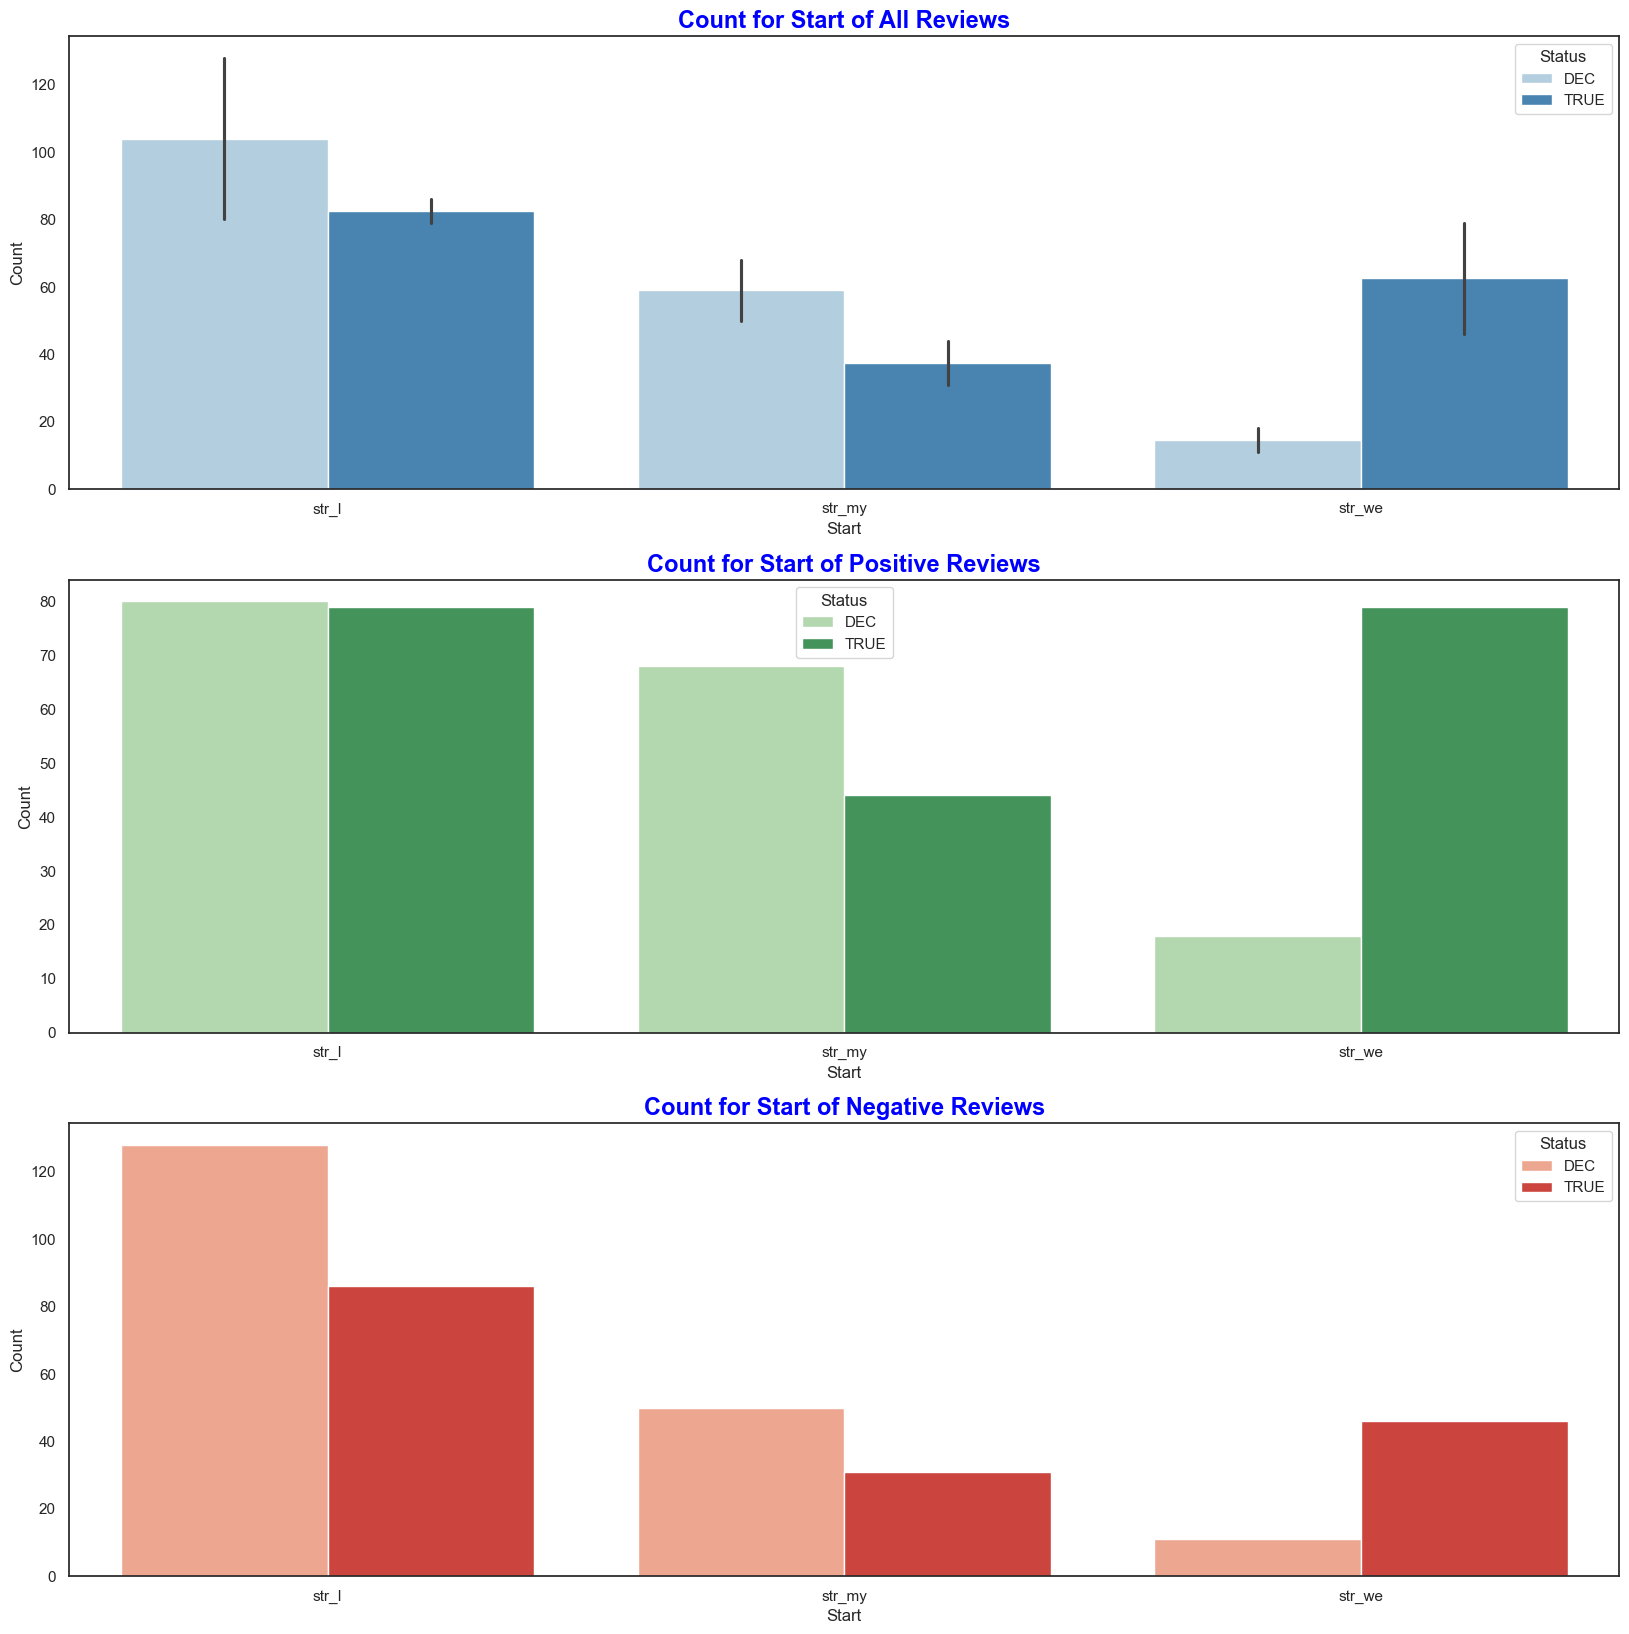

In [113]:
#Code Block 48

sns.set(style='white')
plt.figure(figsize=(20,20))

plt.subplot(311)
sns.barplot(x = "Start", y = "Count",  hue = 'Status', data = str_review_melt, palette='Blues') 
plt.title('Count for Start of All Reviews', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')

plt.subplot(312)
sns.barplot(x = "Start", y = "Count",  hue = 'Status', data = str_review_melt[str_review_melt['Type']=='POS'], palette='Greens') 
plt.title('Count for Start of Positive Reviews', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')

plt.subplot(313)
sns.barplot(x = "Start", y = "Count",  hue = 'Status', data = str_review_melt[str_review_melt['Type']=='NEG'], palette='Reds') 
plt.title('Count for Start of Negative Reviews', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center')

### Create a Pandas Series
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

<h2 style="color:blue;">Creating a Word Cloud for Reviews</h2> 

- pip install wordcloud

In [117]:
#Code Block 49

from PIL import Image
from os import path
import random

from wordcloud import WordCloud

In [119]:
#Code Block 50

text = neg_true['Reviews']
type(text)

pandas.core.series.Series

In [121]:
#Code Block 51

text

0      My wife and I just spent a long weekend at the...
1      The historic feel of the hotel really had a st...
2      I haven't actually stayed at this hotel- yet- ...
3      I was very much looking forward to our stay at...
4      The hotel is almost always very helpful. This ...
5      The Swissotel is totally understaffed and lack...
6      Do you imagine getting there for the first tim...
7      We stayed here for one night, and found it a h...
8      I want to issue a travel-warning to folks who ...
9      Months prior to my 5-night reservation with th...
10     Our check-in was great, but then we got into o...
11     This is about the fourth time we stayed at the...
12     My daughter and I woke in the morning wanting ...
13     Overview: --Overrated hotel in a premium locat...
14     As a regular visitor to Chicago and a freuent ...
15     Location is excellent, but don't valet your ca...
16     The room was dingy and run down - it felt like...
17     I found this hotel in th

In [123]:
#Code Block 52

text = text.to_string()
display(type(text))
text

str

'0      My wife and I just spent a long weekend at the...\n1      The historic feel of the hotel really had a st...\n2      I haven\'t actually stayed at this hotel- yet- ...\n3      I was very much looking forward to our stay at...\n4      The hotel is almost always very helpful. This ...\n5      The Swissotel is totally understaffed and lack...\n6      Do you imagine getting there for the first tim...\n7      We stayed here for one night, and found it a h...\n8      I want to issue a travel-warning to folks who ...\n9      Months prior to my 5-night reservation with th...\n10     Our check-in was great, but then we got into o...\n11     This is about the fourth time we stayed at the...\n12     My daughter and I woke in the morning wanting ...\n13     Overview: --Overrated hotel in a premium locat...\n14     As a regular visitor to Chicago and a freuent ...\n15     Location is excellent, but don\'t valet your ca...\n16     The room was dingy and run down - it felt like...\n17     I fo

In [125]:
#Code Block 53

from wordcloud import STOPWORDS

In [127]:
#Code Block 54

stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [130]:
#Code Block 55

wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10, random_state=1).generate(text)

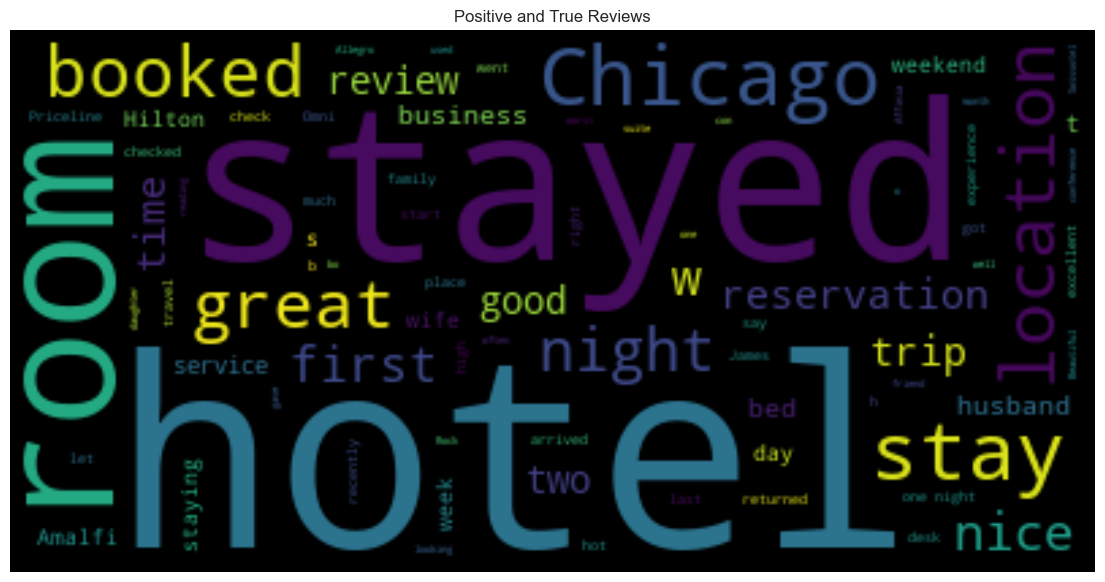

In [132]:
#Code Block 56

default_colors = wc.to_array()
plt.figure(figsize=(14,12))
plt.title("Positive and True Reviews")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [134]:
#Code Block 57
stopwords = set(STOPWORDS)
wc = WordCloud(max_words=100, stopwords=stopwords, margin=10, background_color="white").generate(text)

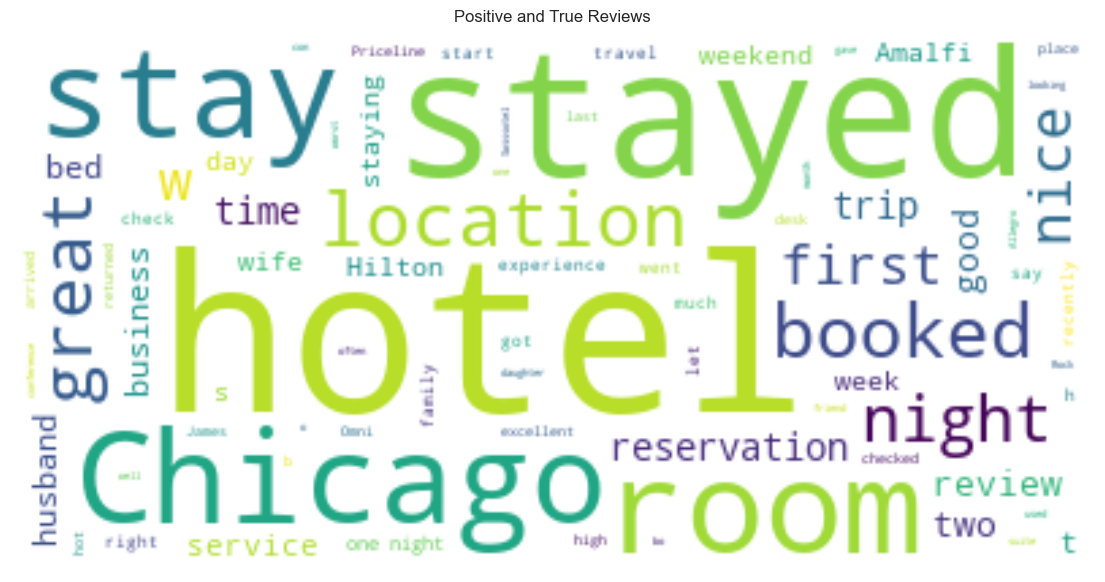

In [136]:
#Code Block 58

plt.figure(figsize=(14,12))
plt.title("Positive and True Reviews")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2 style="color:blue;">nltk and stopwords for better results</h2> 

### nltk for finding common words
- https://www.nltk.org/

### Tokenize the reviews

In [139]:
#Code Block 59

text_say = nltk.word_tokenize(text)
text_say

['0',
 'My',
 'wife',
 'and',
 'I',
 'just',
 'spent',
 'a',
 'long',
 'weekend',
 'at',
 'the',
 '...',
 '1',
 'The',
 'historic',
 'feel',
 'of',
 'the',
 'hotel',
 'really',
 'had',
 'a',
 'st',
 '...',
 '2',
 'I',
 'have',
 "n't",
 'actually',
 'stayed',
 'at',
 'this',
 'hotel-',
 'yet-',
 '...',
 '3',
 'I',
 'was',
 'very',
 'much',
 'looking',
 'forward',
 'to',
 'our',
 'stay',
 'at',
 '...',
 '4',
 'The',
 'hotel',
 'is',
 'almost',
 'always',
 'very',
 'helpful',
 '.',
 'This',
 '...',
 '5',
 'The',
 'Swissotel',
 'is',
 'totally',
 'understaffed',
 'and',
 'lack',
 '...',
 '6',
 'Do',
 'you',
 'imagine',
 'getting',
 'there',
 'for',
 'the',
 'first',
 'tim',
 '...',
 '7',
 'We',
 'stayed',
 'here',
 'for',
 'one',
 'night',
 ',',
 'and',
 'found',
 'it',
 'a',
 'h',
 '...',
 '8',
 'I',
 'want',
 'to',
 'issue',
 'a',
 'travel-warning',
 'to',
 'folks',
 'who',
 '...',
 '9',
 'Months',
 'prior',
 'to',
 'my',
 '5-night',
 'reservation',
 'with',
 'th',
 '...',
 '10',
 'Our',

In [141]:
#Code Block 60

Counter(text_say).most_common(20)

[('...', 405),
 ('the', 161),
 ('I', 158),
 ('a', 140),
 ('hotel', 94),
 (',', 94),
 ('and', 86),
 ('at', 82),
 ('for', 72),
 ('to', 68),
 ('.', 65),
 ('in', 64),
 ('stayed', 61),
 ('was', 61),
 ('The', 56),
 ('We', 51),
 ('this', 48),
 ('is', 43),
 ('My', 33),
 ('Chicago', 32)]

### Add stopwords

In [144]:
#Code Block 61

from nltk.corpus import stopwords

In [146]:
#Code Block 62

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donovanmanogue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### List of default English stopwords

In [149]:
#Code Block 63

cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [151]:
#Code Block 64

tokens = [w for w in nltk.word_tokenize(text.lower())
        if w.isalpha()]

In [153]:
#Code Block 65
no_stops = [t for t in tokens
        if t not in cachedStopWords]

In [155]:
#Code Block 66

Counter(no_stops).most_common(20)

[('hotel', 107),
 ('stayed', 71),
 ('chicago', 33),
 ('stay', 32),
 ('room', 28),
 ('location', 25),
 ('booked', 23),
 ('great', 21),
 ('nights', 14),
 ('nice', 13),
 ('first', 12),
 ('one', 11),
 ('trip', 11),
 ('w', 11),
 ('night', 10),
 ('two', 10),
 ('business', 9),
 ('good', 9),
 ('husband', 9),
 ('rooms', 8)]

In [157]:
#Code Block 67

cachedStopWords.update(('stayed', 'stay','hotel', 'chicago'))

In [159]:
#Code Block 68

no_stops = [t for t in tokens
        if t not in cachedStopWords]

In [161]:
#Code Block 68

Counter(no_stops).most_common(20)

[('room', 28),
 ('location', 25),
 ('booked', 23),
 ('great', 21),
 ('nights', 14),
 ('nice', 13),
 ('first', 12),
 ('one', 11),
 ('trip', 11),
 ('w', 11),
 ('night', 10),
 ('two', 10),
 ('business', 9),
 ('good', 9),
 ('husband', 9),
 ('rooms', 8),
 ('service', 8),
 ('wife', 7),
 ('weekend', 7),
 ('reservation', 7)]

### Seeing more than one word together: ngrams
- http://www.nltk.org/api/nltk.html?highlight=ngram

In [164]:
#Code Block 69

from nltk.util import ngrams

### Create bi-gram

In [167]:
#Code Block 70

bigrams = ngrams(no_stops, 2)
Counter(bigrams).most_common(20)

[(('one', 'night'), 7),
 (('great', 'location'), 5),
 (('good', 'location'), 4),
 (('daughter', 'woke'), 3),
 (('woke', 'morning'), 3),
 (('morning', 'wanting'), 3),
 (('palmer', 'house'), 3),
 (('start', 'saying'), 3),
 (('booked', 'thru'), 3),
 (('booked', 'room'), 3),
 (('wife', 'spent'), 2),
 (('looking', 'forward'), 2),
 (('great', 'got'), 2),
 (('location', 'excellent'), 2),
 (('first', 'let'), 2),
 (('let', 'say'), 2),
 (('booked', 'five'), 2),
 (('business', 'trip'), 2),
 (('hard', 'rock'), 2),
 (('front', 'desk'), 2)]

<h2 style="color:blue;">Lemmatizing Negative True Reviews</h2> 

### Lemmatizing and Stemming data

- **Stemming** is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.
- **Lemmatization**, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.
#### Which one to choose?
- Stemming and Lemmatization both generate the root form of the inflected words. 
- The difference:
    - Stem might not be an actual word whereas
    - Lemma is an actual language word.
- Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma. 

**Since process time is not an issue with this dataset, we will use lemmatizing**

### Need to download nltk
https://www.guru99.com/download-install-nltk.html

In [172]:
#Code Block 71

from nltk.stem import WordNetLemmatizer

In [174]:
#Code Block 72

wordnet_lemmatizer = WordNetLemmatizer()

In [176]:
#Code Block 73

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [177]:
#Code Block 74

text_bow = Counter(lemmatized)
text_bow.most_common(20)

[('room', 36),
 ('location', 25),
 ('night', 24),
 ('booked', 23),
 ('great', 21),
 ('nice', 13),
 ('first', 12),
 ('one', 11),
 ('reservation', 11),
 ('time', 11),
 ('trip', 11),
 ('w', 11),
 ('two', 10),
 ('review', 10),
 ('business', 9),
 ('good', 9),
 ('husband', 9),
 ('bed', 9),
 ('service', 8),
 ('wife', 7)]

In [178]:
#Code Block 75

text_chart = pd.DataFrame(text_bow.most_common(20), columns = ['word', 'freq'])
text_chart

,word,freq
0,room,36
1,location,25
2,night,24
3,booked,23
4,great,21
5,nice,13
6,first,12
7,one,11
8,reservation,11
9,time,11


In [179]:
#Code Block 76

bigrams_lem = ngrams(lemmatized, 2)
Counter(bigrams_lem).most_common(30)

[(('one', 'night'), 7),
 (('great', 'location'), 5),
 (('good', 'location'), 4),
 (('daughter', 'woke'), 3),
 (('woke', 'morning'), 3),
 (('morning', 'wanting'), 3),
 (('palmer', 'house'), 3),
 (('start', 'saying'), 3),
 (('booked', 'thru'), 3),
 (('booked', 'room'), 3),
 (('wife', 'spent'), 2),
 (('looking', 'forward'), 2),
 (('great', 'got'), 2),
 (('location', 'excellent'), 2),
 (('first', 'let'), 2),
 (('let', 'say'), 2),
 (('booked', 'five'), 2),
 (('business', 'trip'), 2),
 (('hard', 'rock'), 2),
 (('front', 'desk'), 2),
 (('one', 'worst'), 2),
 (('night', 'kni'), 2),
 (('checked', 'room'), 2),
 (('room', 'empty'), 2),
 (('empty', 'beer'), 2),
 (('beer', 'bo'), 2),
 (('day', 'weekend'), 2),
 (('booked', 'priceline'), 2),
 (('many', 'time'), 2),
 (('night', 'hot'), 2)]

In [184]:
#Code Block 77

trigrams_lem = ngrams(lemmatized, 3)
Counter(trigrams_lem).most_common(20)

[(('daughter', 'woke', 'morning'), 3),
 (('woke', 'morning', 'wanting'), 3),
 (('first', 'let', 'say'), 2),
 (('checked', 'room', 'empty'), 2),
 (('room', 'empty', 'beer'), 2),
 (('empty', 'beer', 'bo'), 2),
 (('omni', 'chosen', 'location'), 2),
 (('chosen', 'location', 'whichwor'), 2),
 (('wife', 'spent', 'long'), 1),
 (('spent', 'long', 'weekend'), 1),
 (('long', 'weekend', 'historic'), 1),
 (('weekend', 'historic', 'feel'), 1),
 (('historic', 'feel', 'really'), 1),
 (('feel', 'really', 'st'), 1),
 (('really', 'st', 'actually'), 1),
 (('st', 'actually', 'much'), 1),
 (('actually', 'much', 'looking'), 1),
 (('much', 'looking', 'forward'), 1),
 (('looking', 'forward', 'almost'), 1),
 (('forward', 'almost', 'always'), 1)]

In [186]:
#Code Block 78

quadgrams_lem = ngrams(lemmatized, 4)
Counter(quadgrams_lem).most_common(5)

[(('daughter', 'woke', 'morning', 'wanting'), 3),
 (('checked', 'room', 'empty', 'beer'), 2),
 (('room', 'empty', 'beer', 'bo'), 2),
 (('omni', 'chosen', 'location', 'whichwor'), 2),
 (('wife', 'spent', 'long', 'weekend'), 1)]

In [188]:
#Code Block 79

df_true[df_true['Reviews'].str.contains("empty beer")]

,Reviews,Type,Status,TypeStatus
56,We were checked into a room with empty beer bo...,NEG,TRUE,Negative True
258,We were checked into a room with empty beer bo...,NEG,TRUE,Negative True


In [193]:
#Code Block 80

pd.set_option('display.max_colwidth', 1)
df_true[df_true['Reviews'].str.contains("empty beer")]

,Reviews,Type,Status,TypeStatus
56,"We were checked into a room with empty beer bottles,dirty shorts in the closet and an unclean bathroom. There was no manager available for an hour to take any complaints. The front desk lady said the manager was on a LUNCH break at 7 PM!!!!!!! We missed our show at Navy Pier because of the extra time it took in moving into another room etc. Finally when I got to talk to the manager and complained about beer bottles she offered to send me wine and cheese to make up for the inconvenience!!! This was totally inappropiate since I had children including a teenager with me. She gave me a $30 compensation for ruining our family holiday!!!! Staff was somewhat reluctant to take request of extra blankets at night. They kept telling me to look into the closet for extra blankets. I asked for two blanket, but they delivered one. I had to keep calling to get settled for the night. I saw a filled out comment form from the prior guest in our room on the study desk, who had taken the trouble of filling it out, but no one collected it or cared for it. Noisy rooms. Can hear the doors open and close all night. The breakfast items kept running out and had to make calls to get them replenished. I will not recommend this hotel to any one even at discounted rates!!",NEG,TRUE,Negative True
258,"We were checked into a room with empty beer bottles, dirty underwear in the closet and unclean bathroom. There was no manager available for an hour to take any complaints. We missed our show because of the extra time it took in moving into another room etc. Finally when I got to talk to the manager and complained about beer bottles especially when I had a child and a teenager with me she offered to send me wine and cheese to make up for the inconvenience!!! Staff was somewhat reluctant to take request of extra blankets at night. They kept telling me to look into the closet for extra blankets. I asked for two blanket , but they delivered one. I had to keep calling to get settled. I saw a comment form from the prior guest in our room on the study desk, who had taken the trouble of filling it out, but no one collected it or cared for it. ht. Noisy rooms. Can hear the doors all night. Thebreakfast items kept running out and had to make calls to get them replenished. I will not recommend this hotel to any one even at discounted rates!!",NEG,TRUE,Negative True


<h2 style="color:blue;">Lemmatizing Negative Deceptive Reviews and comparing to Negative True</h2> 


In [196]:
#Code Block 81

text_n = neg_dec['Reviews']
text_n = text_n.to_string()
display(type(text_n))
text_n

str

'0      I was extremely disappointed with my stay at the Omni Chicago Hotel. It was a hot summer day and I turned on the shower and only drips of hot water came out. I called to complain and they assured me that someone would be in my room to fix the shower or show me how to use it. I felt the person I spoke to was rude to me. They were not accepting responsibility, but talking down to me as if I was stupid. After waiting 30 minutes a bell hop came up to show me how to use the shower. This was not a service person. He could not get the shower to work either and apologized for the problem I was having. He expected a tip and complained when I did not give him one. Nobody came up after that. I was told I could switch to a different room, so I had to pack up my belongings and move to another floor. The shower did work in this other room, but I didn\'t have the view of the city that I had in the first room. I was looking at a brick wall. Plus there was a party in the next room that was so l

In [197]:
#Code Block 82

tokens_n = [w for w in nltk.word_tokenize(text_n.lower())
        if w.isalpha()]
no_stops_dec = [t for t in tokens_n
        if t not in cachedStopWords]

In [198]:
#Code Block 83

Counter(no_stops_dec).most_common(20)

[('room', 979),
 ('would', 327),
 ('service', 245),
 ('one', 224),
 ('could', 204),
 ('like', 204),
 ('desk', 196),
 ('get', 190),
 ('staff', 178),
 ('us', 165),
 ('rooms', 164),
 ('night', 162),
 ('time', 160),
 ('even', 156),
 ('front', 148),
 ('got', 142),
 ('experience', 137),
 ('first', 131),
 ('back', 124),
 ('arrived', 117)]

In [200]:
#Code Block 84

lemmatized_dec = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_dec]
text_bow_dec = Counter(lemmatized_dec)
text_bow_dec.most_common(20)

[('room', 1143),
 ('would', 327),
 ('service', 264),
 ('one', 229),
 ('could', 204),
 ('like', 204),
 ('desk', 197),
 ('get', 193),
 ('night', 190),
 ('time', 187),
 ('staff', 179),
 ('u', 165),
 ('even', 156),
 ('bed', 154),
 ('front', 149),
 ('experience', 149),
 ('got', 142),
 ('first', 131),
 ('back', 124),
 ('reservation', 118)]

In [225]:
#Code Block 85

bigrams_dec = ngrams(lemmatized_dec, 2)
Counter(bigrams_dec).most_common(20)

[(('front', 'desk'), 138),
 (('room', 'service'), 79),
 (('got', 'room'), 38),
 (('customer', 'service'), 36),
 (('would', 'recommend'), 35),
 (('even', 'though'), 33),
 (('another', 'room'), 31),
 (('hard', 'rock'), 31),
 (('called', 'front'), 29),
 (('finally', 'got'), 28),
 (('new', 'room'), 26),
 (('room', 'ready'), 25),
 (('desk', 'clerk'), 25),
 (('next', 'morning'), 25),
 (('room', 'available'), 24),
 (('looked', 'like'), 23),
 (('fairmont', 'millennium'), 21),
 (('one', 'night'), 20),
 (('looking', 'forward'), 20),
 (('millennium', 'park'), 20)]

In [236]:
#Code Block 86

trigrams_dec = ngrams(lemmatized_dec, 3)
Counter(trigrams_dec).most_common(20)

[(('called', 'front', 'desk'), 27),
 (('fairmont', 'millennium', 'park'), 20),
 (('front', 'desk', 'clerk'), 13),
 (('would', 'recommend', 'anyone'), 13),
 (('palmer', 'house', 'hilton'), 12),
 (('sofitel', 'water', 'tower'), 11),
 (('never', 'go', 'back'), 11),
 (('finally', 'got', 'room'), 11),
 (('front', 'desk', 'staff'), 9),
 (('room', 'service', 'took'), 8),
 (('ordered', 'room', 'service'), 7),
 (('woman', 'front', 'desk'), 7),
 (('good', 'night', 'sleep'), 7),
 (('call', 'front', 'desk'), 7),
 (('upon', 'entering', 'room'), 6),
 (('room', 'looked', 'like'), 6),
 (('went', 'back', 'room'), 6),
 (('front', 'desk', 'complain'), 6),
 (('upon', 'arrival', 'room'), 5),
 (('one', 'worst', 'experience'), 5)]

In [238]:
#Code Block 87

quadgrams_dec = ngrams(lemmatized_dec, 4)
Counter(quadgrams_dec).most_common(20)

[(('called', 'front', 'desk', 'ask'), 5),
 (('called', 'front', 'desk', 'complain'), 5),
 (('one', 'worst', 'hotel', 'ever'), 4),
 (('would', 'never', 'go', 'back'), 4),
 (('front', 'desk', 'made', 'wait'), 3),
 (('room', 'two', 'queen', 'bed'), 3),
 (('recently', 'fairmont', 'millennium', 'park'), 3),
 (('called', 'front', 'desk', 'asked'), 3),
 (('room', 'woman', 'front', 'desk'), 3),
 (('room', 'called', 'front', 'desk'), 3),
 (('decided', 'order', 'room', 'service'), 3),
 (('asked', 'moved', 'another', 'room'), 3),
 (('room', 'service', 'took', 'hour'), 3),
 (('service', 'took', 'hour', 'half'), 3),
 (('took', 'minute', 'get', 'room'), 2),
 (('took', 'long', 'time', 'get'), 2),
 (('front', 'desk', 'staff', 'friendly'), 2),
 (('one', 'night', 'millennium', 'knickerbocker'), 2),
 (('one', 'worst', 'experience', 'ever'), 2),
 (('called', 'room', 'service', 'asked'), 2)]

### Create DataFrame for bigrams

#### Negative Positive DataFrame

In [232]:
#Code Block 88

bigrams_reviews = (pd.Series(nltk.ngrams(lemmatized, 2)).value_counts())
bigrams_reviews = pd.DataFrame(bigrams_reviews).reset_index()
bigrams_reviews.rename(columns={'index': 'bigram_true', 0:'true_count'},inplace=True)
bigrams_reviews = bigrams_reviews.head(20)
bigrams_reviews

,bigram_true,count
0,"(one, night)",7
1,"(great, location)",5
2,"(good, location)",4
3,"(booked, room)",3
4,"(palmer, house)",3
5,"(booked, thru)",3
6,"(morning, wanting)",3
7,"(woke, morning)",3
8,"(daughter, woke)",3
9,"(start, saying)",3


In [234]:
#Code Block 89

bigrams_reviews_dec = (pd.Series(nltk.ngrams(lemmatized_dec, 2)).value_counts())
bigrams_reviews_dec = pd.DataFrame(bigrams_reviews_dec).reset_index()
bigrams_reviews_dec.rename(columns={'index': 'bigram_dec', 0:'dec_count'},inplace=True)
bigrams_reviews_dec=bigrams_reviews_dec.head(20)
bigrams_reviews_dec

,bigram_dec,count
0,"(front, desk)",138
1,"(room, service)",79
2,"(got, room)",38
3,"(customer, service)",36
4,"(would, recommend)",35
5,"(even, though)",33
6,"(another, room)",31
7,"(hard, rock)",31
8,"(called, front)",29
9,"(finally, got)",28


In [235]:
#Code Block 90

bigrams_reviews_all = pd.concat((bigrams_reviews, bigrams_reviews_dec), axis=1)
bigrams_reviews_all

,bigram_true,count,bigram_dec,count
0,"(one, night)",7,"(front, desk)",138
1,"(great, location)",5,"(room, service)",79
2,"(good, location)",4,"(got, room)",38
3,"(booked, room)",3,"(customer, service)",36
4,"(palmer, house)",3,"(would, recommend)",35
5,"(booked, thru)",3,"(even, though)",33
6,"(morning, wanting)",3,"(another, room)",31
7,"(woke, morning)",3,"(hard, rock)",31
8,"(daughter, woke)",3,"(called, front)",29
9,"(start, saying)",3,"(finally, got)",28


### Reset index for df_reviews
- When all four datasets were concatenated together, they kept their index, which was 0 - 399 for each dataset.
- Therefore, there are four of each value. 
- Reset index sets the index to 0 - 1599.

In [209]:
#Code Block 91

display(df_reviews.info())
df_reviews.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviews     1600 non-null   object
 1   Type        1600 non-null   object
 2   Status      1600 non-null   object
 3   TypeStatus  1600 non-null   object
dtypes: object(4)
memory usage: 62.5+ KB


None

,Reviews,Type,Status,TypeStatus
395,"At first my husband and I were really excited for our family to enjoy the T-Rex Experience package. We figured it would be a great deal package even though the hotel itself felt too ""ritzy"" for us to travel with our four children. But after two nights of downtown Chicago fun we realized that The Talbott transcends it's ritzy look and truly embraces a family friendliness which we thoroughly enjoyed.",POS,DEC,Positive Deceptive
396,"While making the obligatory trip to the Chicago area to visit family, we decided to make it fun for the teenage members of our group and reserved a couple of rooms at the Hard Rock Hotel Chicago. What a great decision! The rooms are very upscale at a reasonable price with great amenities. And, according the younger members of the family, ""very cool""! We can't wait to come back.",POS,DEC,Positive Deceptive
397,"We really enjoyed our stay! It is a beautiful hotel and the entire staff is helpful and polite. They had great suggestions on where to eat, what to do, etc. We were within walking distance of many great Chicago locations like the Navy Pier and Art Institute. The rooms were clean and the beds comfortable, I would recommend this hotel to anyone looking for a great home away from home in Chicago.",POS,DEC,Positive Deceptive
398,"The Palmer House Hlton Hotel has to be the nicest hotel I have stayed at in Chicago. I went to Chicago on a business trip for a meeting. When I arrived once I walked in, the lobby was beautiful, I couldn't hardly wait to see my room. The rooms were just as nice, the bathroom was immaculate! We had a meeting in the Clark Meeting Room, even that was nice! I wanted to take a tour of the hotel itself! I was there for about 3 days and because of how convenient the hotel was to a lot of major attractions like, Grant Park, Lake Michigan, Mag Mile which is a shopping heaven, and the Navy Pier, it never really like the normal stressed out meetings. I love Chicago and I now have a new favorite hotel to stay at while I'm in town.",POS,DEC,Positive Deceptive
399,"Although much too overpriced in my opinion, the hotel is spotless. The staff was very courteous. And the spa service ? Was a God send ! In a relatively flexible location for traveling for sight seeing so I didnt spend major bucks trying to get around the city ! LOVE IT ! Going back for my anniversary",POS,DEC,Positive Deceptive


In [210]:
#Code Block 92

df_true.reset_index(inplace=True)
df_true = df_true.drop('index', axis=1)
df_true.tail()

df_deceptive.reset_index(inplace=True)
df_deceptive = df_deceptive.drop('index', axis=1)

df_reviews.reset_index(inplace=True)
df_reviews = df_reviews.drop('index', axis=1)
df_reviews.tail()

,Reviews,Type,Status,TypeStatus
1595,"At first my husband and I were really excited for our family to enjoy the T-Rex Experience package. We figured it would be a great deal package even though the hotel itself felt too ""ritzy"" for us to travel with our four children. But after two nights of downtown Chicago fun we realized that The Talbott transcends it's ritzy look and truly embraces a family friendliness which we thoroughly enjoyed.",POS,DEC,Positive Deceptive
1596,"While making the obligatory trip to the Chicago area to visit family, we decided to make it fun for the teenage members of our group and reserved a couple of rooms at the Hard Rock Hotel Chicago. What a great decision! The rooms are very upscale at a reasonable price with great amenities. And, according the younger members of the family, ""very cool""! We can't wait to come back.",POS,DEC,Positive Deceptive
1597,"We really enjoyed our stay! It is a beautiful hotel and the entire staff is helpful and polite. They had great suggestions on where to eat, what to do, etc. We were within walking distance of many great Chicago locations like the Navy Pier and Art Institute. The rooms were clean and the beds comfortable, I would recommend this hotel to anyone looking for a great home away from home in Chicago.",POS,DEC,Positive Deceptive
1598,"The Palmer House Hlton Hotel has to be the nicest hotel I have stayed at in Chicago. I went to Chicago on a business trip for a meeting. When I arrived once I walked in, the lobby was beautiful, I couldn't hardly wait to see my room. The rooms were just as nice, the bathroom was immaculate! We had a meeting in the Clark Meeting Room, even that was nice! I wanted to take a tour of the hotel itself! I was there for about 3 days and because of how convenient the hotel was to a lot of major attractions like, Grant Park, Lake Michigan, Mag Mile which is a shopping heaven, and the Navy Pier, it never really like the normal stressed out meetings. I love Chicago and I now have a new favorite hotel to stay at while I'm in town.",POS,DEC,Positive Deceptive
1599,"Although much too overpriced in my opinion, the hotel is spotless. The staff was very courteous. And the spa service ? Was a God send ! In a relatively flexible location for traveling for sight seeing so I didnt spend major bucks trying to get around the city ! LOVE IT ! Going back for my anniversary",POS,DEC,Positive Deceptive


### Create a DataFrame for AllReviews

In [214]:
#Code Block 93

df_reviews.to_csv('data/AllReviews.csv')

In [215]:
#Code Block 94

import xlsxwriter

writer = pd.ExcelWriter('data/AllReviews.xlsx', engine = 'xlsxwriter')
df_reviews.to_excel(writer, sheet_name = 'All')
df_deceptive.to_excel(writer, sheet_name = 'Deceptive')
df_true.to_excel(writer, sheet_name = 'True')
writer.save()
writer.close()

AttributeError: 'XlsxWriter' object has no attribute 'save'